# **Feature Selection-Information gain - mutual information In Classification**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# plt.style.use('ggplot')
# sns.set_theme(style='whitegrid')
%matplotlib inline

### **Mutual Information**

MI Estimate mutual information for a discrete target variable.

**Mutual information** (MI) between two random variables is a **non-negative** value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

The function relies on nonparametric methods based on entropy estimation from `k-nearest` neighbors distances.

**Inshort**

>A quantity called mutual information measures the amount of information one can obtain from one random variable given another.

The mutual information between two random variables `X` and `Y` can be stated formally as follows:

$$I(X ; Y) = H(X) - H(X | Y)$$


Where $I(X ; Y)$ is the mutual information for $X$ and $Y$, $H(X)$ is the entropy for $X$ and $H(X | Y)$ is the conditional entropy for $X$ given $Y$. The result has the units of bits.

**Mutual Information** is another metric used in feature selection to measure **the amount of information shared between a feature and the target variable in a dataset**.

In feature selection, **we aim to select features that have a high mutual information score**, as they provide significant information for classifying instances.

Calculate the mutual information between each feature and the target variable in the dataset.

The mutual information measures the amount of shared information or dependency between the feature and the target variable. Higher mutual information indicates a stronger relationship between the feature and the target.




### **Information Gain**

**Information gain** is a metric used in feature selection to measure the amount of useful information a feature provides for classifying instances in a dataset. It quantifies the reduction in entropy achieved by splitting the data based on a particular feature.

In feature selection, we aim to select features that maximize information gain, as they contribute the most to improving the classification accuracy. Features with higher information gain have a stronger ability to discriminate between different classes or categories.

Here's an explanation of information gain with respect to feature selection, along with a code example in Python:

- Calculate the entropy of the target variable (class labels) before splitting the data.

- For each feature, calculate the entropy of the target variable after splitting the data based on that feature.

- Calculate the information gain by subtracting the weighted average of the entropies after splitting from the entropy before splitting.

- Select the feature with the highest information gain as the most informative one.

Here's an example code snippet that demonstrates the calculation of information gain for feature selection using the scikit-learn library:

In [5]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.datasets import load_iris

# Load the Iris dataset as an example
data = load_iris()
X = data.data    # Features
y = data.target  # Target variable

# Calculate the information gain using mutual information
info_gain = mutual_info_classif(X, y)

# Create a dictionary with feature names and their corresponding information gains
feature_info_gain = {}
for i, feature_name in enumerate(data.feature_names):
    feature_info_gain[feature_name] = info_gain[i]

# Sort the features based on their information gains in descending order
sorted_features = sorted(feature_info_gain.items(), key=lambda x: x[1], reverse=True)

# Print the features along with their information gains
for feature, gain in sorted_features:
    print(f"{feature}: {gain}")

petal length (cm): 0.992514020273614
petal width (cm): 0.9812752768915809
sepal length (cm): 0.5005835268330199
sepal width (cm): 0.25100885362047176


### **Entropy**




Entropy is a measure of impurity or disorder in a set of data. In the context of feature selection, entropy is used to quantify the amount of information provided by a feature in distinguishing different classes or categories within the dataset.

When performing feature selection, we want to identify features that have the highest discriminatory power. In other words, we aim to select features that provide the most information in differentiating between different classes or categories.

The entropy of a feature can be calculated using the formula:
$$Entropy = -∑(p * log_{2}(p))$$



Here's an example of calculating the entropy for a feature in Python:


[`np.unique`](https://numpy.org/doc/stable/reference/generated/numpy.unique.html)

In [6]:
a = np.array(['a', 'b', 'b', 'c', 'a'])

_, indices = np.unique(a, return_index=True)
print(_, indices)

['a' 'b' 'c'] [0 1 3]


In [7]:
b = np.array([1, 2, 6, 4, 2, 3, 2])

_, indices = np.unique(b, return_index=True)
print(_, indices)

[1 2 3 4 6] [0 1 5 3 2]


In [8]:
import numpy as np

def calculate_entropy(feature):
    _, counts = np.unique(feature, return_counts=True)
    print(_, counts)
    total_count = np.sum(counts)
    print(total_count)
    probabilities = counts / total_count
    print(probabilities)
    entropy = - np.sum(probabilities * np.log10(probabilities))
    return entropy

# Example feature data
# feature_data = [0, 0, 1, 1, 0, 1, 1, 0, 1, 1]
# feature_data = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]  # Modified to have mostly one unique value
feature_data = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]  # Repeated pattern

# Calculate entropy
entropy = calculate_entropy(feature_data)

print("Entropy:", entropy)

[0 1 2 3 4 5 6 7 8 9] [2 2 2 2 2 2 2 2 2 2]
20
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
Entropy: 1.0


Entropy measures the amount of disorder or randomness within a feature. A feature with entropy close to `0` indicates high purity and strong discriminatory power, **meaning it provides valuable information for classification**.

 On the other hand, an entropy value close to `1` suggests low purity and weak discriminatory power, indicating the **feature doesn't contribute much useful information for classification**.

 The goal of feature selection is to choose features with low entropy (`close to 0`) as they are more informative and helpful for classification tasks.

### **Gini Impurity**

Gini impurity is another metric used in feature selection to measure the impurity or disorder within a feature. It quantifies the probability of misclassifying a randomly chosen element in a dataset.

In feature selection, we aim to select features that minimize Gini impurity, as they provide better discriminatory power for classification tasks.

Here's an explanation of Gini impurity with respect to feature selection, along with a code example in Python:

- Calculate the Gini impurity of the target variable (class labels) before splitting the data.

- For each feature, calculate the Gini impurity of the target variable after splitting the data based on that feature.

- Calculate the Gini impurity reduction by subtracting the weighted average of the Gini impurities after splitting from the Gini impurity before splitting.

- Select the feature with the highest Gini impurity reduction as the most informative one.

Here's an example code snippet that demonstrates the calculation of Gini impurity for feature selection using the scikit-learn library:

In [9]:
from sklearn.feature_selection import f_classif
from sklearn.datasets import load_iris

# Load the Iris dataset as an example
data = load_iris()
X = data.data  # Features
y = data.target  # Target variable

# Calculate the Gini impurity using the f_classif function
gini_impurity = 1 - f_classif(X, y)[1]  # Gini impurity is calculated as (1 - p-value)

# Create a dictionary with feature names and their corresponding Gini impurities
feature_gini_impurity = {}
for i, feature_name in enumerate(data.feature_names):
    feature_gini_impurity[feature_name] = gini_impurity[i]

# Sort the features based on their Gini impurities in descending order
sorted_features = sorted(feature_gini_impurity.items(), key=lambda x: x[1], reverse=True)

# Print the features along with their Gini impurities
for feature, impurity in sorted_features:
    print(f"{feature}: {impurity}")

sepal length (cm): 1.0
sepal width (cm): 1.0
petal length (cm): 1.0
petal width (cm): 1.0


`f_classif` function from scikit-learn to calculate the `Gini impurity` for each feature in the Iris dataset. We subtract the p-value (obtained from the `f_classif` test) from 1 to obtain the Gini impurity.

# **Feature Selection on Wine Dataset**

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# plt.style.use('ggplot')
# sns.set_theme(style='whitegrid')
%matplotlib inline

In [11]:
wine_url = "https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv"

df = pd.read_csv(wine_url)
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [12]:
df['Wine'].unique()

array([1, 2, 3])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [14]:
# dependent and independent varible
X = df.drop(labels=['Wine'], axis=1)
y = df['Wine']

# Train test split to avoid overfitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=0)

In [15]:
X_train.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
22,13.71,1.86,2.36,16.6,101,2.61,2.88,0.27,1.69,3.80,1.11,4.00,1035
108,12.22,1.29,1.94,19.0,92,2.36,2.04,0.39,2.08,2.70,0.86,3.02,312
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
145,13.16,3.57,2.15,21.0,102,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830
71,13.86,1.51,2.67,25.0,86,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410


In [16]:
from sklearn.feature_selection import mutual_info_classif

# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.41697149, 0.30446488, 0.16672225, 0.25594489, 0.18272976,
       0.48436941, 0.7216235 , 0.09857294, 0.2677412 , 0.61417198,
       0.56767144, 0.53855308, 0.53415077])

In [17]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Flavanoids              0.721624
Color.int               0.614172
Hue                     0.567671
OD                      0.538553
Proline                 0.534151
Phenols                 0.484369
Alcohol                 0.416971
Malic.acid              0.304465
Proanth                 0.267741
Acl                     0.255945
Mg                      0.182730
Ash                     0.166722
Nonflavanoid.phenols    0.098573
dtype: float64

<Axes: >

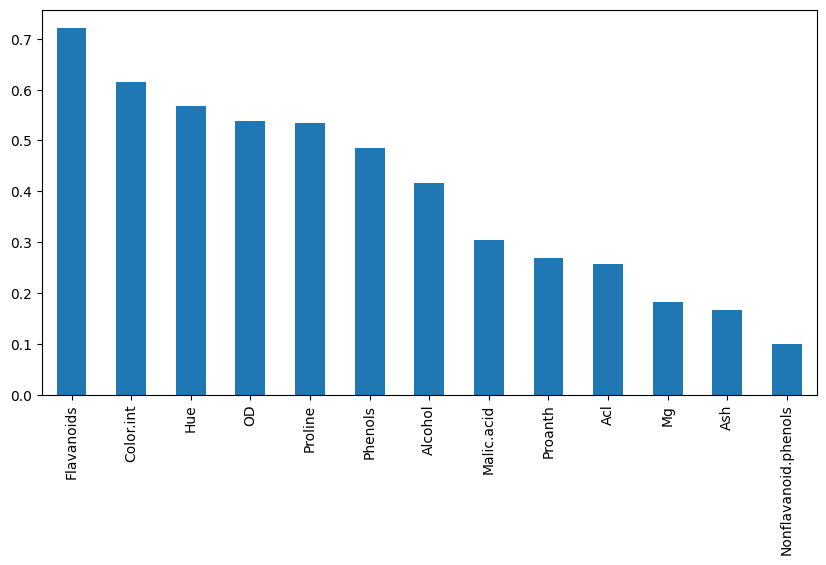

In [18]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(10, 5))

In [19]:
from sklearn.feature_selection import SelectKBest

#No we Will select the  top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=5)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['Flavanoids', 'Color.int', 'Hue', 'OD', 'Proline'], dtype='object')

#### **Difference Between Information Gain And Mutual Information**


$$I(X ; Y) = H(X) - H(X | Y)$$
and
$$IG(S, a) = H(S) - H(S | a)$$

As such, mutual information is sometimes used as a synonym for
information gain. Technically, they calculate the same quantity
if applied to the same data.


Mutual information $(I(X; Y))$ measures the amount of shared information between two variables, `X` and `Y`. It tells us how much knowing the value of one variable reduces uncertainty about the other variable.

Information gain $(IG(S, a))$ is used in machine learning and decision trees to assess the usefulness of a feature (attribute) in predicting a target variable. It quantifies the reduction in uncertainty about the target variable achieved by splitting the data based on a specific feature.

While mutual information and information gain may yield the same result when applied to the same data, they serve different purposes. Mutual information focuses on measuring the dependence between variables, while information gain is used for feature selection in machine learning.

### **Comparion of Univariate And Mutual Information**

Comparison of `F-test` and `Mutual Information`?

The `F-test` and `Mutual Information` are both **statistical measures** used to `analyze relationships between variables`, but they have different applications and interpretations.

- The `F-test` is used to compare the variances between two or more groups or samples. It determines whether the means of these groups are significantly different from each other. The F-test calculates the ratio of the variances between groups and within groups, and based on this ratio, it determines the statistical significance of the differences. The F-test is commonly used in analysis of variance (ANOVA) to test for differences in means across multiple groups.

- On the other hand, `Mutual Information` measures the dependence or information shared between two variables. It quantifies the reduction in uncertainty about one variable when the value of the other variable is known. Mutual Information is often used in feature selection and information theory. It helps identify the relevance or amount of information one variable provides about another.



|     | F-test| Mutual Information |
| --- | --------------------------------------------- | ---------------------------------------------- |
| `Use` | Compares variances between groups              | Measures dependence between variables           |
| `Application` | Testing differences in means across groups   | Feature selection, information theory           |
| `Interpretation` | Determines statistical significance of differences | Quantifies shared information or dependence |
| `Focus` | Group comparisons                              | Information content and relevance between variables |




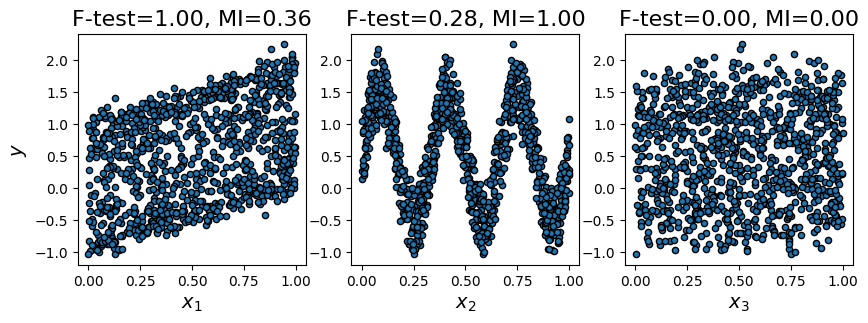

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_regression, mutual_info_regression

np.random.seed(0)
X = np.random.rand(1000, 3)
y = X[:, 0] + np.sin(6 * np.pi * X[:, 1]) + 0.1 * np.random.randn(1000)

f_test, _ = f_regression(X, y)
f_test /= np.max(f_test)

mi = mutual_info_regression(X, y)
mi /= np.max(mi)

plt.figure(figsize=(10, 3))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.scatter(X[:, i], y, edgecolor="black", s=20)
    plt.xlabel("$x_{}$".format(i + 1), fontsize=14)
    if i == 0:
        plt.ylabel("$y$", fontsize=14)
    plt.title("F-test={:.2f}, MI={:.2f}".format(f_test[i], mi[i]), fontsize=16)
plt.show()

Learn about information gain and mutual information for feature selection
Click to collapse
00:00
Information gain is also known as mutual information in classification
Understanding statistical tests like p-value, t-test, and chi-square is important for feature selection


Mutual information measures dependencies between variables
Click to collapse
02:13
Mutual information is non-negative and equal to zero if variables are independent
Mutual information is used in feature selection to compare independent features and find relationships with dependent feature



Feature selection is crucial in classification
Click to collapse
04:32
Statistical tests like chi square and mutual information are used for feature selection
Mutual information measures the dependency between independent and target features

Perform train test split to avoid overfitting
Click to collapse
06:48
Check for unique values and preprocess data
Perform feature selection using mutual info classification



Using mutual info classification to select important features
Click to collapse
09:00
Mutual info classification gives either zero or positive values for feature dependency on target variable
Sorting the values in descending order gives the most important features, such as flavonoids



Selecting top features using mutual information
Click to collapse
10:58
Using mutual information to plot feature importance in decreasing order
Selecting top features using select k best or percentile methods

Selecting top 5 important features for machine learning model
Click to collapse
12:59
Using get_support to get indexes of top features
Information gain and mutual information are technically the same


✦
Mutual information is a good technique for feature selection
Click to collapse
15:07
Mutual information can capture any kind of dependencies within the variable
F-test captures only linear dependency